In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
print(os.listdir())

Matplotlib is building the font cache using fc-list. This may take a moment.


In [ ]:
time = []
x = []
with open ("TESTFILE.LOG") as file:
    for index,line in enumerate(file.readlines()):
        if len(line.split(",")[0][2:][:-1]) > 10 or line.split(",")[0][3:][0] == "-":
            continue
        x.append(float(line.split(",")[0][2:][:-1].replace(",","")))
        time.append(index)


In [ ]:
plt.plot(time,x)
plt.xticks(np.arange(0, len(time), 20.0))
plt.yticks(np.arange(min(x), max(x), 0.2))
plt.title("Sampling at 20 HZ")

temp = pd.DataFrame(columns=['time', 'acceleration'])
temp["time"] = np.array(time)
temp["acceleration"] = np.array(x)

# Rolling Average Point of Analysis
# calculate a 20 second rolling mean and plot
#temp["acceleration"].rolling(window=10,center=False).mean().plot(style='g')
temp["acceleration"].rolling(window=15,center=False).mean().plot(style='y')
# add the 20 second rolling variance:
temp["acceleration"].rolling(window=10,center=False).std().plot(style='r')
plt.show()


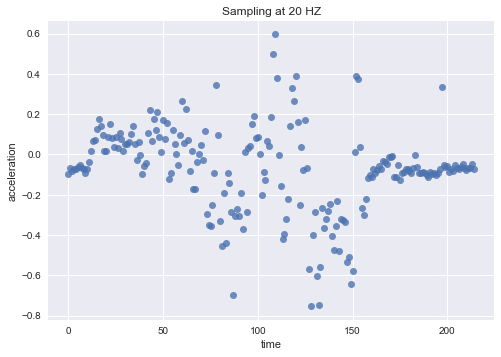

In [5]:
import seaborn as sns
sns.regplot(x=temp["time"], y=temp["acceleration"],fit_reg=False)
plt.title("Sampling at 20 HZ")
plt.show()



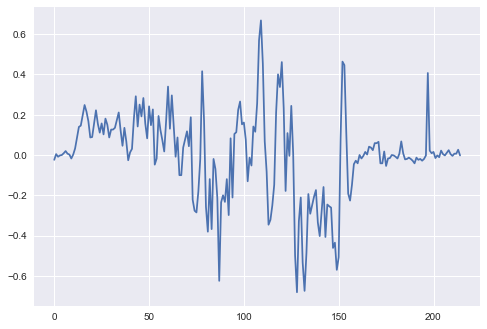

In [48]:
plt.plot(x-np.mean(x))
#plt.plot(time,x)
#plt.xticks(np.arange(0, len(time), 20.0))
#plt.yticks(np.arange(min(x), max(x), 0.2))
#plt.title("Sampling at 20 HZ")
plt.show()


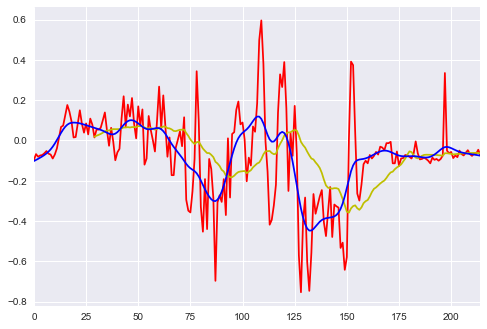

In [72]:
import scipy.signal as signal
# First, design the Buterworth filter
N  = 2    # Filter order
Wn = 0.1 # Cutoff frequency
B, A = signal.butter(N, Wn, output='ba')
smooth_data = signal.filtfilt(B,A,x)
plt.plot(x[0:500],'r-')
temp["acceleration"].rolling(window=30,center=False).mean().plot(style='y')
plt.plot(smooth_data[0:500],'b-')
plt.show()
# Thresholds should be that 0.2 and or above in the negative direction will be a break